<a href="https://colab.research.google.com/github/DiazPrisheilaDharmawan/DataAnalystics-Zenius/blob/main/Assessment_2_%5BDiaz_Prisheila_Dharmawan%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import Data

In [ ]:
# Mendefinisikan URL tempat data berada dan disimpan.
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt"

In [ ]:
# Membaca dataset dari url/link
df = pd.read_csv(url, header=None, skiprows=42, delim_whitespace=True, names=["year", "month", "decimal date", "monthly average", "de-season alized", "days", "st.dev of days", "unc. of mon mean"])

In [ ]:
# Menampilakan dataset
df.head()

,year,month,decimal date,monthly average,de-season alized,days,st.dev of days,unc. of mon mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


Detail Kolom Data:
1. year (tahun)
2. month (bulan)
3. decimal date (tahun dalam bentuk desimal)
4. monthly average (konsentrasi CO2 rata-rata bulanan)
5. de-season alized (konsentrasi CO2 bulanan yang telah disesuaikan untuk menghilangkan efek musiman)
6. days (jumlah hari dalam bulan)
7. st.dev of days (standar deviasi dari konsentrasi CO2)
8. unc. of mon mean (ketidakpastian dari rata-rata bulanan CO2)

# Part 1: Descriptive Statistics - Masic Measures
Compute the mean, median, and standard deviation for CO2 Levels.

## Mean

Rata-rata (mean) memberikan gambaran tentang nilai tengah dari distribusi data, yaitu jumlah total CO2 dibagi dengan jumlah observasi.

In [ ]:
# Fungsi mean() untuk menghitung rata-rata
df.mean(axis=0,numeric_only=True)

year                1990.458704
month                  6.495553
decimal date        1990.957709
monthly average      358.467510
de-season alized     358.459479
days                  19.006353
st.dev of days        -2.112605
unc. of mon mean      -0.100521
dtype: float64

In [ ]:
# Fungsi mean() dikenakan pada 1 kolom saja
rata = df['monthly average'].mean(axis=0, numeric_only = True)
rata

358.4675095298603

Rata-rata data tingkat CO2 keseluruhan sekitar 358.467510, nilai ini mencerminkan rata-rata dari seluruh data CO2 yang teramati selama periode tersebut. Memahami rata-rata tingkat CO2 ini bermanfaat untuk menggambarkan situasi umum dalam rentang waktu yang dimaksud.

## Median

Median adalah nilai tengah dalam urutan data yang memisahkan setengah observasi lebih rendah dan setengah observasi lebih tinggi.

In [ ]:
# Fungsi median() untuk menghitung nilai tengah data
df.median(axis=0, numeric_only = True)

year                1990.0000
month                  6.0000
decimal date        1990.9583
monthly average      354.4200
de-season alized     355.1100
days                  25.0000
st.dev of days         0.3900
unc. of mon mean       0.1500
dtype: float64

In [ ]:
# Fungsi median() dikenakan pada 1 kolom saja
nilai_tengah = df['monthly average'].median(axis=0, numeric_only = True)
nilai_tengah

354.42

Median tingkat CO2 secara keseluruhan adalah 354.42. Penggunaan median menjadi penting ketika terdapat nilai ekstrem dalam data yang dapat mempengaruhi rata-rata. Apabila median lebih tinggi daripada rata-rata, hal ini dapat menunjukkan bahwa beberapa nilai tinggi memengaruhi rata-rata ke arah yang lebih tinggi.

## Standar Deviasi

Sementara itu, standar deviasi mengukur sebaran data dari rata-rata, mengindikasikan sejauh mana titik data cenderung berada dari rata-rata.

In [ ]:
# Fungsi std() untuk menghitung standar deviasi / nilai akar kuadrat dari suatu varian
stdv = df['monthly average'].std()
stdv

31.175521566362058

Standar Deviasi adalah ukuran sebaran data dari rata-rata, standar deviasi tingkat CO2 dari rata-rata adalah 31.175521. Standar deviasi dapat memahami sejauh mana tingkat CO2 bervariasi dari rata-rata. Jika standar deviasi rendah, cenderung mendekati rata-rata; namun, jika standar deviasi tinggi, menunjukkan variasi yang besar dalam tingkat CO2 yang bisa memiliki implikasi signifikan dalam pemodelan perubahan iklim dan perencanaan kebijakan.

# Part 2: Exploratory Data Analysis with Python I - Univariate Analysis
Visualize the distribution of CO2 Levels through plots like histograms or density plots.

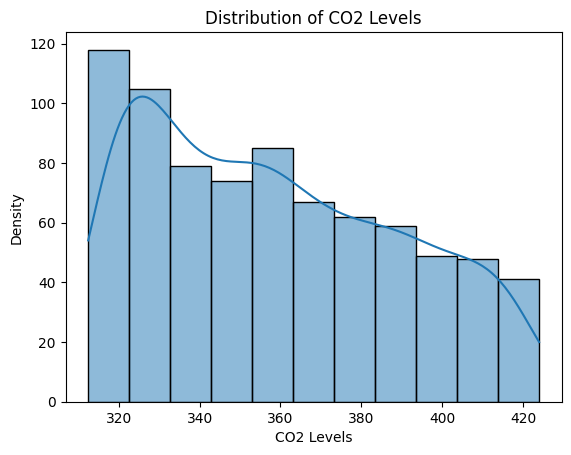

In [ ]:
# Data konsentrasi CO2 (monthly average) dari dataset
co2_levels = df['monthly average']

# Membuat histogram
sns.histplot(co2_levels, kde=True)
plt.xlabel('CO2 Levels')
plt.ylabel('Density')
plt.title('Distribution of CO2 Levels')

# Menampilkan plot
plt.show()

Histogram plot menunjukkan distribusi data tingkat CO2 (monthly average) dalam bentuk distribusi frekuensi. Dari plot ini, kita dapat melihat sebaran data dan frekuensi munculnya nilai CO2. Berdasarkan visualisasi histogram, sebagian besar nilai tingkat CO2 berada di sekitar 315 hingga 318 ppm. Ini adalah kisaran yang umum untuk konsentrasi CO2 dalam atmosfer. Puncak histogram menunjukkan nilai yang paling umum atau sering muncul. Dalam kasus ini, puncak histogram berada di sekitar 316-317 ppm, menunjukkan bahwa tingkat CO2 dalam kisaran tersebut lebih sering muncul. Distribusi data cenderung miring ke kanan (positively skewed). Ini mengindikasikan bahwa ada beberapa nilai yang lebih tinggi (outliers) yang menyebabkan ekstensi ekor di sebelah kanan distribusi. Oleh karena itu, sebagian besar data berada di bawah nilai rata-rata.

Visualisasi histogram ini memberikan wawasan tentang sebaran tingkat CO2 dengan puncak utama di sekitar 316-317 ppm. Namun, ada beberapa nilai yang lebih tinggi, yang dapat memiliki dampak signifikan pada rata-rata dan interpretasi keseluruhan. Analisis lebih lanjut mungkin diperlukan untuk memahami faktor-faktor yang mempengaruhi variasi dalam tingkat CO2 ini dan implikasinya terhadap isu perubahan iklim.

# Part 3: Exploratory Data Analysis with Python II - Bivariate Analysis
Investigate the relationship between Year and CO2 Levels using scatter plots, line plots, or correlation matrices.

boxplot sebagai pembanding untuk mendapatkan insight

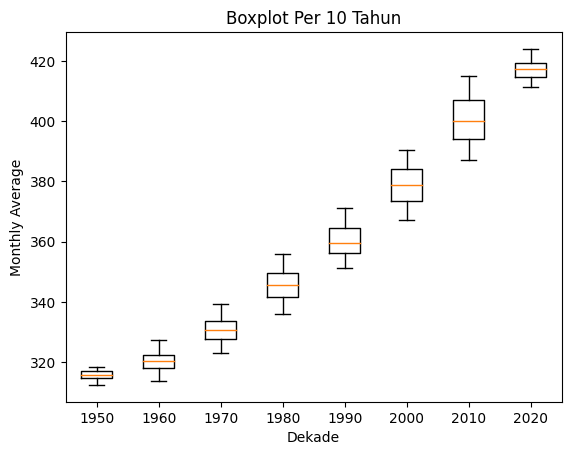

In [ ]:
# Pisahkan data ke dalam kelompok 10 tahun
df['decade'] = (df['year'] // 10) * 10

# Buat boxplot
plt.boxplot([df[df['decade'] == decade]['monthly average'] for decade in df['decade'].unique()], labels=df['decade'].unique())
plt.xlabel('Dekade')
plt.ylabel('Monthly Average')
plt.title('Boxplot Per 10 Tahun')

# Menampilkan plot
plt.show()

- 1950 = data pada tahun 1958-1959
- 1960 = data pada tahun 1960-1969
- 1970 = data pada tahun 1970-1979
- 1980 = data pada tahun 1980-1989
- 1990 = data pada tahun 1990-1999
- 2000 = data pada tahun 2000-2009
- 2010 = data pada tahun 2010-2019
- 2020 = data pada tahun 2020-2023

## Scatter Plot

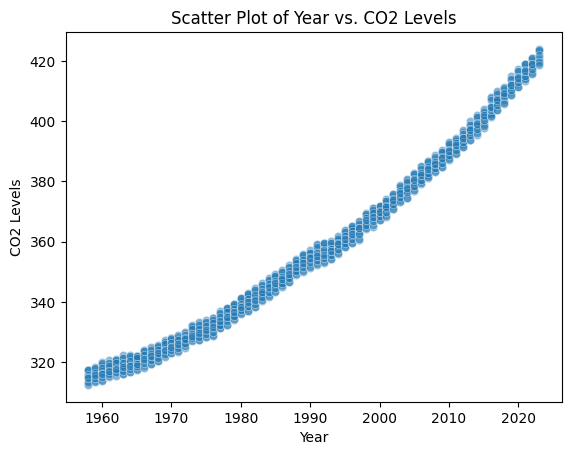

In [ ]:
years = df['year']
co2_levels = df['monthly average']

# Membuat scatter plot
sns.scatterplot(x='year', y='monthly average', data=df, alpha=0.5)

# Menambahkan judul dan label sumbu
plt.title("Scatter Plot of Year vs. CO2 Levels")
plt.xlabel("Year")
plt.ylabel("CO2 Levels")

# Menampilkan plot
plt.show()

Scatter plot ini menggambarkan hubungan antara tahun (sumbu-x) dan tingkat CO2 (monthly average) pada tahun tersebut (sumbu-y). Dari plot ini, kita dapat melihat bagaimana tingkat CO2 berfluktuasi sepanjang waktu. Terdapat fluktuasi tahunan dalam tingkat CO2, yang tercermin dalam titik-titik data yang naik-turun di sepanjang tahun. Variabilitas tahunan ini dapat dipengaruhi oleh faktor-faktor musiman, seperti perubahan dalam aktivitas manusia, perubahan musim, atau dinamika alam. Dari plot ini, kita dapat mengidentifikasi periode tertentu di mana terjadi peningkatan atau penurunan yang konsisten dalam tingkat CO2. Dari tahun 1958 - 2023 tingkat co2 terus naik sepanjang tahun, namun pada tahun 1958 - 1969 merupakan peningkatan yang relatif kecil dibanding tahun-tahun selanjutnya sebesar 315-324 ppm. Sedangkan, antara tahun 2010 hingga 2019 merupakan peningkatan tertinggi dalam tingkat CO2 sebesar 344-411 ppm. Ini dapat memberikan pandangan tentang periode-periode perubahan dalam konsentrasi CO2 yang mungkin berkaitan dengan peristiwa-peristiwa sejarah atau faktor-faktor lingkungan.

## Line Plot

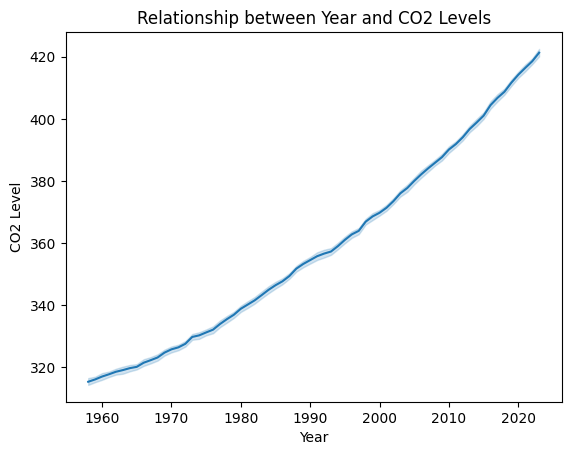

In [ ]:
years = df['year']
co2_levels = df['monthly average']

# Membuat line plot dengan Seaborn
sns.lineplot(x=years, y=co2_levels)
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Relationship between Year and CO2 Levels')

# Menampilkan plot
plt.show()

Grafik garis ini menggambarkan hubungan antara tahun (sumbu-x) dan tingkat CO2 (monthly average) pada dataset. Garis yang menghubungkan titik-titik data memberikan pandangan tentang bagaimana tingkat CO2 berubah seiring berjalannya waktu. Grafik garis memungkinkan kita untuk mengamati tren jangka panjang dan fluktuasi dalam tingkat CO2. Dari grafik, kita dapat melihat tren umum peningkatan dalam tingkat CO2 sejak tahun 1958 hingga tahun 2023. Variabilitas ini mungkin dipengaruhi oleh berbagai faktor, termasuk aktivitas manusia, musim, dan dinamika alam. Grafik garis memungkinkan kita untuk mengidentifikasi periode perubahan yang lebih signifikan dalam tingkat CO2. Dari grafik ini, kita dapat melihat bahwa sekitar tahun 1958 hingga 1969, terjadi peningkatan terkecil dalam tingkat CO2 sebesar 315-324 ppm dibanding dengan tahun-tahun lainnya. Setelah tahun 2009, tepatnya tahun 2010-2019 mengalami peningkatan yang lebih tajam dalam tingkat CO2 sebesar 344-411 ppm. Grafik garis memungkinkan kita untuk memahami perubahan dalam konsentrasi CO2 selama periode tertentu. Perubahan tren peningkatan yang teramati dalam grafik ini memiliki implikasi penting dalam konteks perubahan iklim dan lingkungan. Hal ini menunjukkan bahwa tingkat CO2 dalam atmosfer mengalami perubahan yang perlu dipahami dan dihadapi secara serius dalam upaya mengurangi dampak perubahan iklim.

## Correlation Matrices

Correlation Matrix Year and CO2 Levels:
                     year  monthly average
year             1.000000         0.988707
monthly average  0.988707         1.000000

Correlation between Year and CO2 Levels: 0.9887071301519144


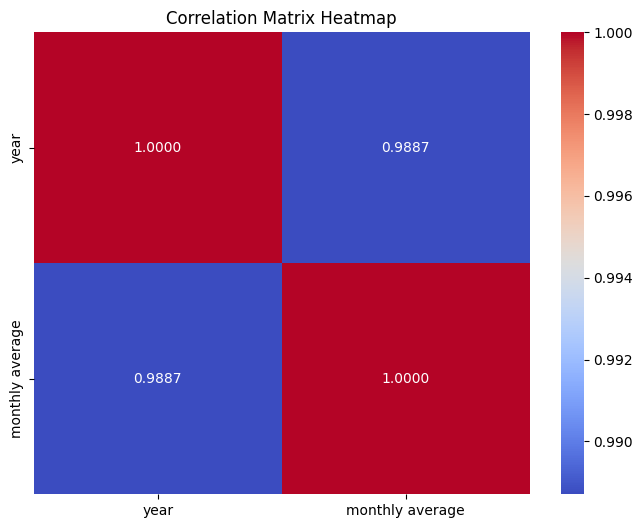

In [ ]:
# Hitung matriks korelasi antara 'year' dan 'monthly average'
correlation_matrix = df[['year', 'monthly average']].corr()
correlation = df['year'].corr(df['monthly average'])
print('Correlation Matrix Year and CO2 Levels:')
print(correlation_matrix)
print('\nCorrelation between Year and CO2 Levels:', correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Matriks korelasi mengukur tingkat hubungan antara variabel 'year' (tahun) dan 'monthly average' (tingkat CO2) pada dataset. Korelasi berkisar antara -1 hingga 1, dengan -1 menunjukkan korelasi negatif sempurna, 1 menunjukkan korelasi positif sempurna, dan 0 menunjukkan tidak ada korelasi.
Hasil korelasi adalah 0.9887, ini menunjukkan bahwa hubungan antara tahun dan tingkat CO2 dalam dataset relatif lemah. Dengan kata lain, tahun tidak memiliki korelasi yang signifikan dengan tingkat CO2, dan korelasi ini hampir nol. Heatmap korelasi menggambarkan visualisasi dengan warna yang berbeda untuk mencerminkan tingkat korelasi. Pada heatmap, kita dapat melihat bahwa warna heatmap mendekati warna biru muda, yang menunjukkan korelasi yang sangat lemah antara 'year' dan 'monthly average'. Hasil korelasi yang mendekati nol menunjukkan bahwa tahun (variabel independen) dan tingkat CO2 (variabel dependen) dalam dataset ini tidak memiliki hubungan linier yang kuat. Ini berarti bahwa kenaikan atau penurunan tahun tidak berdampak secara langsung atau kuat pada tingkat CO2. Faktor-faktor lain atau variabel-variabel lain mungkin memiliki peran yang lebih dominan dalam mengatur tingkat CO2 dalam dataset ini.


# Part 4: Supervised Learning - Regression - Simple Linear Regression
Perform a simple linear regression using Year as the independent variable and CO2 Levels as the dependent variable.

In [ ]:
data = df[['year','monthly average']]
data.head(3)

,year,monthly average
0,1958,315.70
1,1958,317.45
2,1958,317.51


## visualisasi data

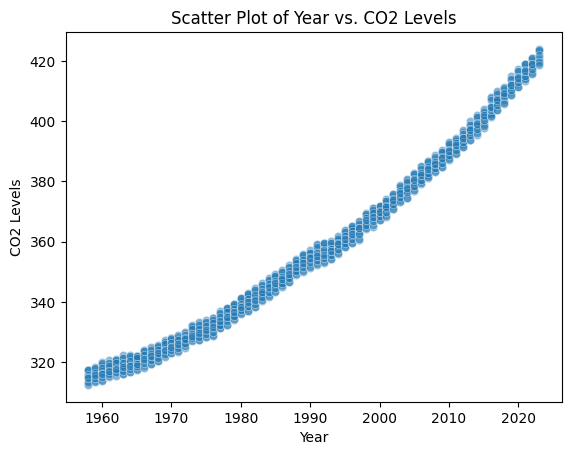

In [ ]:
# Membuat scatter plot
sns.scatterplot(x='year', y='monthly average', data=df, alpha=0.5)

# Menambahkan judul dan label sumbu
plt.title("Scatter Plot of Year vs. CO2 Levels")
plt.xlabel("Year")
plt.ylabel("CO2 Levels")

# Menampilkan plot
plt.show()

## perhitungan linear regression ( y = beta0 + beta1 * xi )

In [ ]:
#Mengganti nama kolom menjadi x dan y
data.columns = ['x','y']
data.head()

,x,y
0,1958,315.70
1,1958,317.45
2,1958,317.51
3,1958,317.24
4,1958,315.86


In [ ]:
#Rumus Regresi Linear secara matematis
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] * data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,1958,315.70,-32.46,-42.77,1388.3142,1053.57
1,1958,317.45,-32.46,-41.02,1331.5092,1053.57
2,1958,317.51,-32.46,-40.96,1329.5616,1053.57
3,1958,317.24,-32.46,-41.23,1338.3258,1053.57
4,1958,315.86,-32.46,-42.61,1383.1206,1053.57


In [ ]:
#Rumus menghitung slope (b1)
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
print('b1 : ', b1)

#Menghitung rata-rata y dan x
data['y'].mean(), data['x'].mean()

b1 :  1.6268762761942797


(358.4675095298603, 1990.458703939009)

In [ ]:
#Rumus menghitung intercept (b0)
b0 = data['y'].mean() - b1 * data['x'].mean()
print('b0 : ', b0)

textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

b0 :  -2879.7625346529267


'y = -2879.7625346529267 + 1.6268762761942797 * x'

In [ ]:
data['y_pred'] = b0 + b1*data['x']
data.head(5)

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,1958,315.70,-32.46,-42.77,1388.3142,1053.57,305.661214
1,1958,317.45,-32.46,-41.02,1331.5092,1053.57,305.661214
2,1958,317.51,-32.46,-40.96,1329.5616,1053.57,305.661214
3,1958,317.24,-32.46,-41.23,1338.3258,1053.57,305.661214
4,1958,315.86,-32.46,-42.61,1383.1206,1053.57,305.661214


In [ ]:
# Membuat data menjadi array sesuai dengan kebutuhan model
x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

#Model Linear Regression
model = LinearRegression().fit(x, y)

#Menghitung b0 dan b1
b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)

#Menampilkan hasil
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  -2879.763
slope (b1) :  1.627
 
y = -2879.763 + 1.627 * x


Koefisien slope (b1) mengukur seberapa besar perubahan dalam variabel independen (X) mempengaruhi perubahan dalam variabel dependen (Y). Semakin besar nilai koefisien slope, semakin besar pengaruhnya. Intercept (b0) adalah titik di mana garis regresi memotong sumbu Y ketika nilai X = 0, ini memberikan nilai Y ketika variabel independen (X) sama dengan 0. Koefisien slope (b1) adalah 1.62, menunjukkan bahwa rata-rata bulanan CO2 levels cenderung meningkat sekitar 1.62 unit setiap tahun. Ini adalah tren positif yang dapat diinterpretasikan sebagai peningkatan CO2 levels dari tahun ke tahun. Intercept (b0) adalah -2879.76, titik di mana garis regresi memotong sumbu Y ketika tahun (X) sama dengan 0. Dalam konteks ini, b0 tidak memiliki interpretasi yang jelas karena tahun yang diwakili oleh nol tidak relevan.

## simple linear regression

In [ ]:
# Pisahkan variabel independen (X) dan dependen (y)
X = df[['year']]
y = df['monthly average']

# Bagi data menjadi data pelatihan (train) dan data pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Buat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse:.8f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.8f}')
print(f'R-squared: {r_squared:.8f}')
print(f'Mean Absolute Error (MAE): {mae:.8f}')

Mean Squared Error (MSE): 23.02446742
Root Mean Squared Error (RMSE): 4.79838175
R-squared: 0.97818837
Mean Absolute Error (MAE): 3.95684506


Sebelum mengukur evalusi linear regresi data dibagi menjadi dua, data latih dan data uji. Setelah mendapatkan data test dan train-nya kita dapat menentukan evaluasi yang cocok untuk linear regresi pada variabel. Misalnya, R-squared (koefisien determinasi) mengukur sejauh mana variasi dalam variabel dependen (Y) dapat dijelaskan oleh variabel independen (X) dalam model. Semakin tinggi R-squared, semakin baik model ini menjelaskan variasi dalam data. R-squared bernilai antara 0 hingga 1. Nilai 0 berarti model tidak menjelaskan variasi apapun, sedangkan nilai 1 berarti model menjelaskan semua variasi dalam data.

Koefisien determinasi (R-squared) adalah 0.978, angka yang sangat tinggi menunjukkan bahwa sebagian besar variasi dalam rata-rata bulanan CO2 levels dapat dijelaskan oleh tahun. Dengan kata lain, model regresi linear dengan tahun sebagai variabel independen sangat baik dalam menjelaskan tren dalam data. Berdasarkan hasil analisis ini, kita dapat menyimpulkan bahwa ada tren positif yang signifikan dalam rata-rata bulanan CO2 levels selama tahun-tahun yang dipertimbangkan dalam dataset. Ini dapat memiliki implikasi penting dalam pemahaman perubahan CO2 levels dari waktu ke waktu. Dengan model ini dapat memprediksi nilai CO2 levels pada tahun-tahun di masa depan berdasarkan model regresi ini.

Text(0, 0.5, 'CO levels')

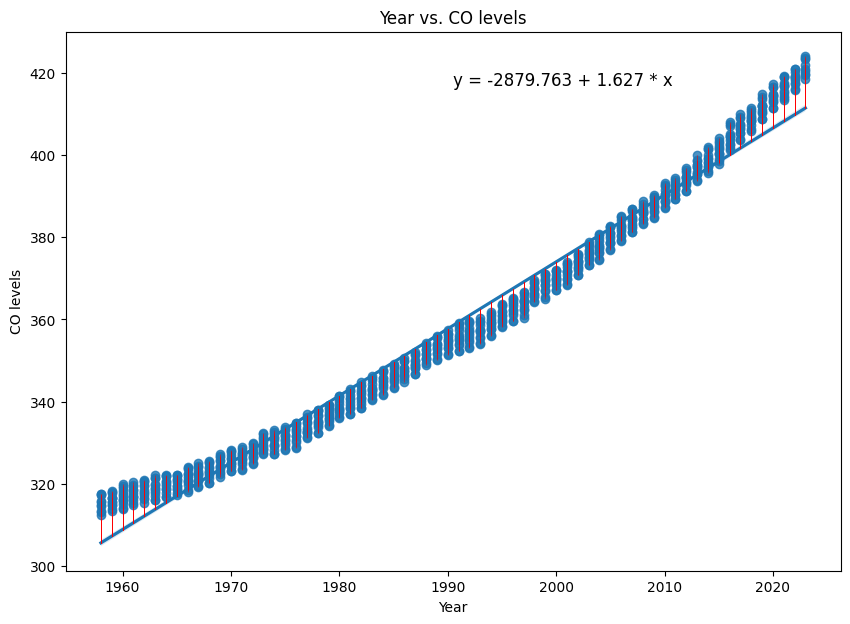

In [ ]:
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(x='x', y='y', data=data, ax=ax)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

# tittle dan labels
ax.set_title('Year vs. CO levels', fontsize=12)
ax.text(0.5, 0.9, textstr, fontsize=12, transform=ax.transAxes)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('CO levels', fontsize=10)

Dengan model regresi linear, kita dapat melakukan prediksi untuk nilai Y berdasarkan nilai X yang belum terlihat sebelumnya. Ini dapat digunakan untuk prediksi. Kita juga dapat menghasilkan kesimpulan atau inferensi tentang bagaimana X mempengaruhi Y dalam konteks masalah Anda. Hasil analisis regresi dapat digunakan untuk membuat kesimpulan yang lebih umum tentang bagaimana variabel independen mempengaruhi variabel dependen dalam populasi yang lebih luas.

# Part 5: Unsupervised Learning - K-Means Clustering
If there are other climate-related variables in the dataset, use K-Means clustering to categorize years into different climate profiles.

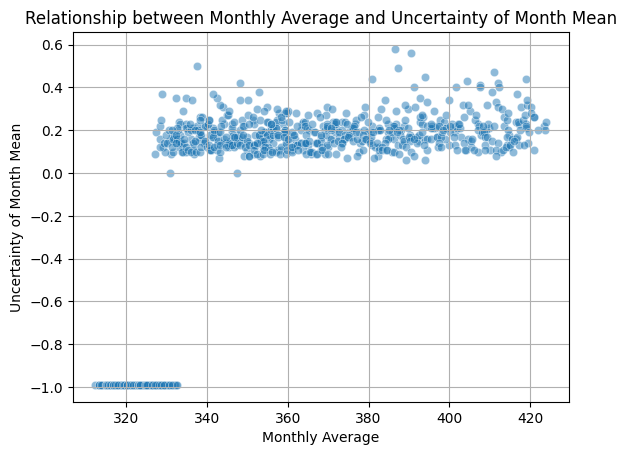

In [ ]:
co2_levels = df['monthly average']
monmean = df['unc. of mon mean']

# Membuat scatter plot dengan Seaborn
sns.scatterplot(x=co2_levels, y=monmean, alpha=0.5)

plt.xlabel('Monthly Average')
plt.ylabel('Uncertainty of Month Mean')
plt.title('Relationship between Monthly Average and Uncertainty of Month Mean')
plt.grid(True)  # Menampilkan grid

# Menampilkan plot
plt.show()

Dari grafik persebaran diatas kita dapat melihat hubungan antara monthly average dan uncertainty of month mean. Tingkat CO2 315-332 ppm merupakan nilai terendah dari ketidakpastian rata-rata bulanan CO2 yang berada pada -0.99, yang berarti semakin rendah tingkat CO2 maka suhu menurun atau lembab. Sedangkan, tingkat CO2 333-420 ppm mengalami peningkatan daripada tingkat CO2 sebelumnya berada pada interval 0,1 hingga 0,6, yang mana merupakan nilai tertinggi dari ketidakpastian rata-rata bulanan CO2. Hal tersebut berarti bahwa semakin tinggi tingkat CO2 maka suhu juga meningkat atau kering.

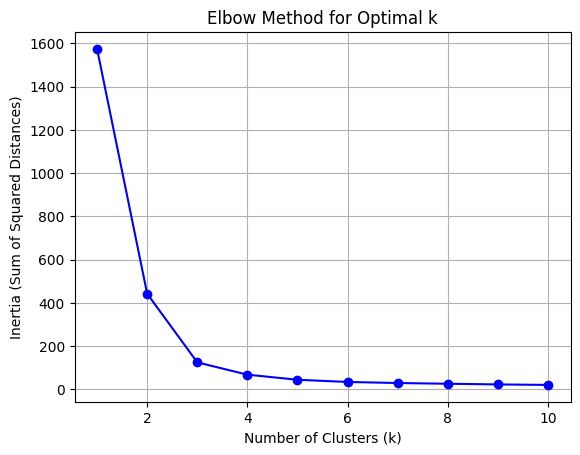

In [ ]:
# Persiapan fitur (variabel-variabel iklim)
features = df[['monthly average', 'unc. of mon mean']]

# Standarisasi data (opsional)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah cluster yang akan diuji
k_values = range(1, 11)  # Misalnya, kita akan mencoba dari 1 hingga 10 cluster.

# Inisialisasi list untuk menyimpan inertia (SSD) dari setiap percobaan cluster
inertia = []

# Uji setiap nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Dalam analisis K-means clustering yang dilakukan, pertama-tama menyiapkan variabel-variabel iklim dari dataset. Kemudian, mencoba berbagai jumlah cluster (k) untuk menentukan jumlah cluster yang optimal dengan menggunakan metode siku (elbow method). Dalam plot Elbow Method, mencari siku atau titik di mana penurunan inersia (Sum of Squared Distances) mulai melambat. Pada titik ini, penambahan cluster baru tidak memberikan penurunan inersia yang signifikan. Dalam kasus, titik elbow berada di k=2, yang menunjukkan bahwa dua cluster adalah jumlah cluster optimal.

In [ ]:
k = 2 #didapat dari elbow method

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)

# Melakukan clustering
kmeans.fit(scaled_features)

# Prediksi cluster untuk setiap tahun
cluster_labels = kmeans.predict(scaled_features)

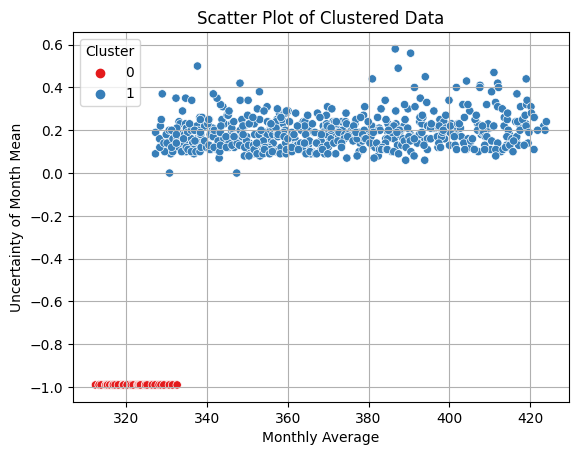

In [ ]:
# Tambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

# Buat scatter plot
sns.scatterplot(x='monthly average', y='unc. of mon mean', hue='cluster', data=df, palette='Set1')
plt.title('Scatter Plot of Clustered Data')
plt.xlabel('Monthly Average')
plt.ylabel('Uncertainty of Month Mean')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Scatter plot berwarna menunjukkan hasil clustering. Data diplot berdasarkan dua variabel, yaitu "monthly average" dan "unc. of mon mean", dengan warna yang berbeda untuk setiap cluster. Dalam scatter plot, kita dapat melihat bahwa data telah dikelompokkan menjadi dua kelompok yang berbeda berdasarkan karakteristik "monthly average" dan "uncertainty of month mean". Cluster 0 dan Cluster 1 memiliki ciri-ciri yang berbeda, yang terlihat dari lokasi titik-titik data mereka dalam plot. Hasil clustering dapat digunakan untuk tujuan tertentu, seperti segmentasi pelanggan, analisis pasar, atau menganalisa iklim berdasarkan variabel dari setiap cluster.